## Getting the data

In [2]:
from etl_pipeline.link_extractor import get_all_links
from etl_pipeline.content_extractor import get_content
import matplotlib.pyplot as plt


In [20]:
entities = ['Roland Berger', 'UBS', 'Credit Suisse', 'Roche', 'Patagonia'] #, 'Microsoft', 'Tesla', 'Wirecard', 'Meta', 'Amazon']
for entity in entities[4:]:
    print(entity)
    links = get_all_links(company=entity)
    links.to_csv(f'data/links/links_{entity}_Apr17.csv', index=False)
    bodies = get_content(links['Link'].drop_duplicates().to_list())
    bodies.to_csv(f'data/bodies/bodies_{entity}_Apr17.csv', index=False)

Patagonia


Getting news article info: 100%|██████████| 500/500 [06:46<00:00,  1.23it/s]


In [3]:
links = get_all_links(company='UBS', max_articles = 100)

In [5]:
import pandas as pd
links = pd.DataFrame(links)

In [6]:
bodies = get_content(links['se_link'].drop_duplicates().to_list())

Getting news article info:  99%|█████████▉| 257/260 [04:06<00:02,  1.04it/s]


KeyboardInterrupt: 

In [7]:
300/34 + 260/210


10.061624649859944

In [2]:
import pandas as pd
import os

current_dir = os.getcwd()
folder_path_l = os.path.join(current_dir, 'data/links')
folder_path_b = os.path.join(current_dir, 'data/bodies')

link_csvs = [f for f in os.listdir(folder_path_l) if f.endswith('.csv')]
bodie_csvs = [f for f in os.listdir(folder_path_b) if f.endswith('.csv')]

all_links = pd.concat([pd.read_csv(f'data/links/{file}') for file in link_csvs], ignore_index=True)
all_bodies = pd.concat([pd.read_csv(f'data/bodies/{file}') for file in bodie_csvs], ignore_index=True)

# About 97% of bodies we get
round(len(all_bodies)/len(all_links['Link'].drop_duplicates()), 2)*100

# But some titles are duplicated
len(all_bodies['Title'].drop_duplicates())

1764

In [3]:
all_links = pd.concat([pd.read_csv(f'data/links/{file}') for file in link_csvs], ignore_index=True)
all_bodies = pd.concat([pd.read_csv(f'data/bodies/{file}') for file in bodie_csvs], ignore_index=True)

In [4]:
round(len(all_bodies)/len(all_links['Link'].drop_duplicates()), 2)*100

97.0

In [25]:
len(all_bodies['Title'].drop_duplicates())

1764

In [15]:
all_bodies['body_len'] = all_bodies['Body'].apply(lambda x: len(str(x)))

## Testing

### <font color='red'> **Why do we get some titles many (>60) times?** </font>


In [ ]:
bodies[bodies.duplicated(subset='Title', keep=False)].sort_values('Title')['Title'].hist()

### <font color='red'> **Percentage of bodies accessed** </font>

In [5]:
bodies = bodies.drop_duplicates(subset='Title', keep='first')
bodies['body_len'] = bodies['Body'].apply(lambda x: len(x))

NameError: name 'bodies' is not defined

In [133]:
bodies[bodies['body_len'] < 200]

,Link,Title,Body,Author,Published,body_len
1,https://www.msn.com/en-us/money/other/swiss-pa...,MSN,,[],None,0
10,https://www.bizjournals.com/washington/news/20...,,,[],2023-04-12 00:00:00,0
39,https://www.globalcapital.com/article/2biwfsa6...,Mercier departs UBS after 13 years,The content you are trying to view is exclusiv...,[],2023-04-12 11:04:40.365000,92
85,https://seekingalpha.com/news/3954780-ubs-chai...,Stock Market Insights,Javascript is Disabled\n\nYour current browser...,[],None,93
179,https://www.investorsobserver.com/news/stock-u...,Where Will UBS Group AG (UBS) Stock Go Next Af...,UBS Group AG has a Bullish sentiment reading. ...,"[Thursday, April, Am, Investorsobserver Analysts]",None,119
199,https://www.marketscreener.com/quote/stock/BAS...,BASF SE : UBS reaffirms its Sell rating,"In his latest research note, analyst Andrew St...",[],None,176
209,https://www.investorsobserver.com/news/stock-u...,Should You Buy UBS Group AG (UBS) Stock Wednes...,UBS has an Overall Score of 67. Find out what ...,"[Wednesday, April, Am, Investorsobserver Analy...",None,104
217,https://www.marketscreener.com/quote/stock/STE...,STELLANTIS : Buy rating from UBS,UBS analyst Patrick Hummel maintains his Buy r...,[],None,109
220,https://www.marketscreener.com/quote/stock/TES...,TESLA : Buy rating from UBS,In a research note published by Patrick Hummel...,[],None,143
224,https://www.forexlive.com/news/ubs-bullish-gol...,"UBS bullish gold, forecast XAU/USD as high as ...","UBS comments on gold, the TL DR version is ana...",[],2023-04-12 00:00:00,164


In [8]:
lens = []
for body in bodies['Body']:
    lens.append(len(body))

(array([ 2.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  3.,  2.,  2.,  3.,  3.,
         0.,  2., 25.,  5.,  1.,  3.,  1.,  1.,  3.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         3.,  2.,  0.,  1.,  3.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,  940.,  960.,  980., 1000.]),
 <BarContainer object of 50 artists>)

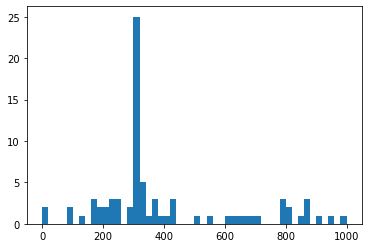

In [10]:
plt.hist(lens, bins=50, range=(0, 1000))

### <font color='red'> **Percentage of dates accessed** </font>

In [148]:
print(round(len(bodies[bodies['Published'].isna()])/len(bodies),2)*100, ' percent of bodies do not have a date')

42.0  percent of bodies do not have a date


### <font color='red'> **Why does it not get the following articles?** </font>

In [66]:
links[~links['Link'].isin(bodies['Link'])]

,Search Engine,Link,Title,Source
13,Bing,https://markets.businessinsider.com/news/stock...,UBS Remains a Buy on Nufarm Limited (NUFMF),Business Insider
35,Bing,https://www.bloomberg.com/news/articles/2023-0...,Swiss Lower House Scuppers Bill to Approve UBS...,Bloomberg L.P.
69,Bing,https://www.nytimes.com/2023/04/05/business/de...,UBS Chiefs See Risks Ahead in Credit Suisse Ta...,The New York Times
96,Bing,https://www.nytimes.com/2023/04/04/business/de...,"For Credit Suisse Shareholders, a Wake Followe...",The New York Times
105,Bing,https://markets.buffalonews.com/buffnews/artic...,UBS advisors Drew Freides and Michael Kanigher...,The Buffalo News
118,Bing,https://www.nytimes.com/2023/03/29/business/de...,UBS Brings Back Ex-C.E.O. to Manage Takeover o...,The New York Times
124,Bing,https://www.thestreet.com/banking/ubs-acquires...,UBS Acquires Credit Suisse for More Than $3 Bi...,TheStreet.com
134,Bing,https://www.nytimes.com/2023/03/19/business/ub...,UBS Agrees to Buy Rival Credit Suisse,The New York Times
136,Bing,https://www.valuepenguin.com/ubs-visa-infinite...,UBS Visa Infinite Credit Card Review: Luxury R...,valuepenguin
148,Bing,https://www.thestreet.com/investing/ubs-credit...,UBS-Credit Suisse Merger May Lead to Massive L...,TheStreet.com


### <font color='lightgreen'> **Date Range** </font>

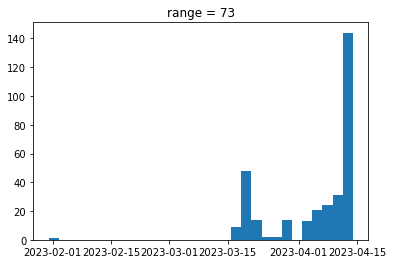

In [85]:
date_range = bodies['Published'].dropna()
date_range = date_range.apply(lambda x: x.date())
r = date_range.max() - date_range.min()
plt.hist(date_range, bins=30)
plt.title(f'range = {r.days}')
plt.show()

### <font color='red'> **Can we solve empty bodies coming from MSN?** </font>

In [ ]:
len(bodies[bodies['Body'] == ''])/(len(bodies))*100

## Comparing to API

In [47]:
import requests

api_key = 'Iv9YVTzDRzUw-iA3_mbR0NzNf8urroyXKtyon67bR-o'

url = 'https://api.newscatcherapi.com/v2/search'

headers = {
    'x-api-key': api_key,
}

params = {
    'q': 'UBS',  # Query for articles about UBS
    'sort_by': 'relevancy',
    'lang' : 'en'
}

response = requests.get(url, headers=headers, params=params)

In [48]:
response.text

'{"status":"ok","total_hits":10000,"page":1,"total_pages":200,"page_size":50,"articles":[{"title":"UBS considers retaining Credit Suisse\'s private banking unit in India: Report","author":"Business Today Desk","published_date":"2023-04-12 05:56:22","published_date_precision":"full","link":"https://www.businesstoday.in/latest/corporate/story/ubs-considers-retaining-credit-suisses-private-banking-unit-in-india-report-377056-2023-04-12","clean_url":"businesstoday.in","excerpt":"The deal inked between UBS and Credit Suisse last month includes $108 billion in liquidity assistance for UBS and Credit Suisse from the Swiss central bank.","summary":"Swiss banking giant UBS is reportedly considering retaining Credit Suisse AG\'s private banking unit in India, making a possible return to the market. This comes after UBS agreed to buy rival Credit Suisse for $3.23 billion in stock last month, and assume up to $5.4 billion in losses.\\u00a0\\n \\nAccording to a report in Bloomberg, the global head 

In [49]:
import json
data = json.loads(response.content)
pprint.pprint(data['articles'][2]['summary'])

('Relying on the Federal Arbitration Act (FAA) and noting that the FAA '
 "'enumerates limited grounds on which a federal court may vacate, modify, or "
 "correct an arbitral award,' the U.S. District Court for the District of "
 'Arizona granted defendants UBS Financial Services Inc. and UBS Credit '
 "Corp.'s motion to confirm an arbitration award and denied the plaintiff's "
 'motion to vacate that award.\n'
 '\n'
 'The plaintiff was employed as a financial adviser for UBS and obtained loans '
 'from UBS during his employment through a financial adviser loan program.')


In [37]:
for x in ['title', 'author', 'published_date', 'published_date_precision', 'link', 'clean_url', 'excerpt', 'summary', 'rights', 'rank', 'topic', 'country', 'language', 'authors', 'media', 'is_opinion', 'twitter_account', '_score', '_id']:
    print(x)

title
author
published_date
published_date_precision
link
clean_url
excerpt
summary
rights
rank
topic
country
language
authors
media
is_opinion
twitter_account
_score
_id


### <font color='lightgreen'> **The API is a lot faster** </font>